In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")            #학습용
test = pd.read_csv("test.csv")              #검증용
submission = pd.read_csv("submission.csv")  #제출용

print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [ ]:
# 데이터 살펴보기

# train 데이터프레임 내용 확인
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# test 데이터프레임 내용 확인
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
# submission 제출파일 양식 확인
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# train 데이터프레임 개요 정보
train.info()

# 891 의 데이터를 확인할 수 있고 2개는 실수형 float 5 정수형 int 
# 일부열은 891개 보다 작은 것으로 보아 결측치가 존재함을 볼수 있다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# train 데이터프레임 통계정보
train.describe(include='all')

# include='all' 옵션을 사용하면 문자열도 일부 정보를 확인할수 있다. 생략하면 숫자데이터만 확인


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


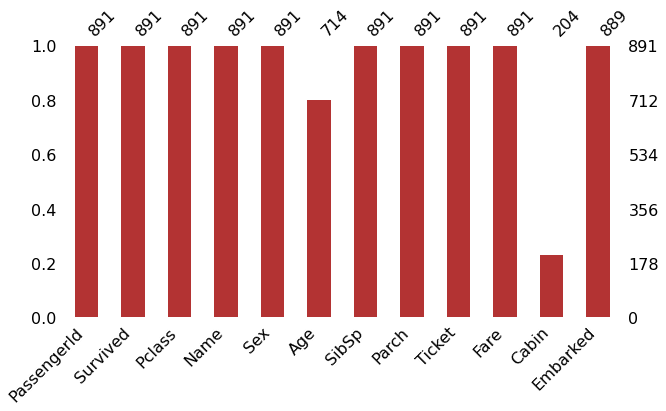

In [ ]:
# 결측값 분포

import matplotlib.pyplot as plt
import missingno as msno

msno.bar(train, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

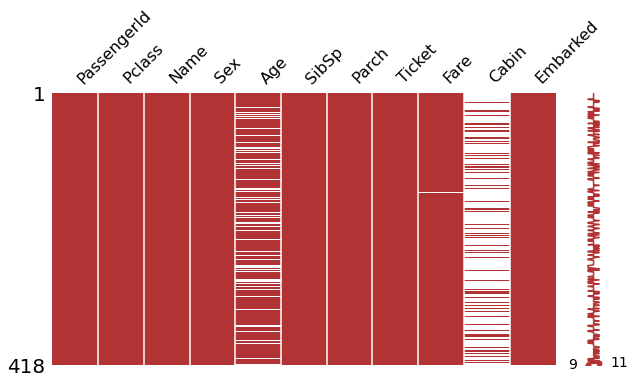

In [ ]:
msno.matrix(test, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

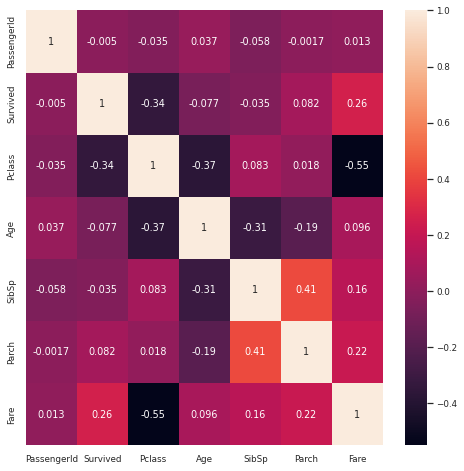

In [ ]:
# 숫자형 변수 간의 상관관계를 계산하여 히트맵 그리기
import seaborn as sns

plt.figure(figsize=(8, 8))

sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True);
plt.show()

In [ ]:
# 데이터 전처리



In [ ]:
# 우선 기본 숫자 데이터만으로 모델을 만들어보자. 

# 타이타닉 전체 데이터셋 준비
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data.shape)

#데이터 분석을 위해 훈련용과 검증용 데이터셋을 먼저 하나로 붙인다. 
#이 전에 나중에 다시 분리하기 쉽게 Train Test 라는 항목을 넣어 둔다. 

(1309, 13)


In [ ]:
# 숫자형 피처 추출
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]


In [ ]:
# 결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
# 결측치를 전부 나이의 평균으로 넣기

data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])
# 결측치를 전부 mode()[0])  최빈값으로 넣기기


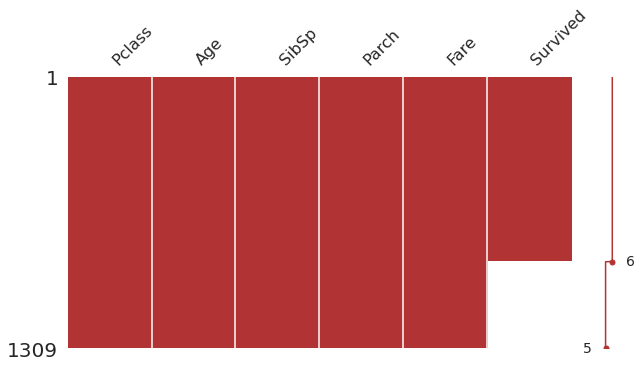

In [ ]:
msno.matrix(data_num, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

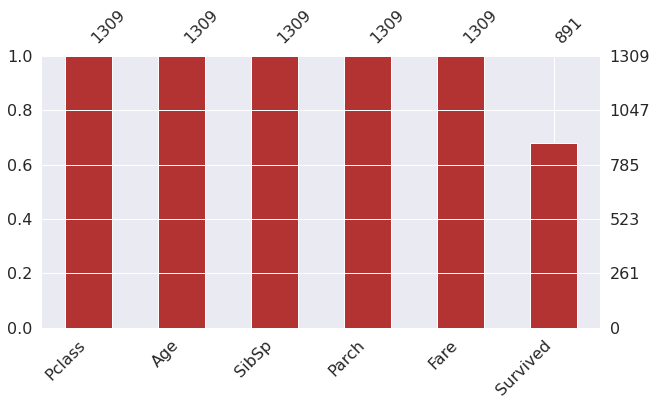

In [ ]:
msno.bar(data_num, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

In [ ]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
X_train = data_num.loc[data['TrainSplit']=='Train', selected_features] 
# 훈련용 문제지
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']
# 훈련용 답안지 
X_test = data_num.loc[data['TrainSplit']=='Test', selected_features]
# 검증용 문제지지

print("Train 데이터셋 크기: ", X_train.shape, y_train.shape)
print("Test 데이터셋 크기: ", X_test.shape)

Train 데이터셋 크기:  (891, 5) (891,)
Test 데이터셋 크기:  (418, 5)


In [ ]:
# 학습 데이터를 훈련용 데이터 80% 검증용 데이터 20%으로 분할하자 
# 100% 전체로 학습을 마치면 확인할 데이터가 없다. 
# 따라서 20% 정도의 데이터를 검증용으로 확보한다. 

# 훈련 - 검증 데이터 분할

# %pip install -U scikit-learn  # 문제 발생시 by 박성준


from sklearn.model_selection import train_test_split


X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.1, 
                                             shuffle=True, random_state=13)


In [ ]:
##################################  전처리 pre processing  ###########################

In [ ]:
# 이전(의사결정나무 DT)과는 달리 이번엔 로지스틱 회귀( LR, Logistic Regression)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()      #객체 생성

lr_model.fit(X_tr, y_tr)             #학습
y_val_pred = lr_model.predict(X_val) #예측

from sklearn.metrics import accuracy_score
print("Accuracy: %.4f" % accuracy_score(y_val, y_val_pred))

# 1st Accuracy: 0.7207
# 2nd Accuracy: 0.7222

Accuracy: 0.7222


In [ ]:
# 제출용 파일 만들기
# test 데이터에 대한 예측값 정리
y_test_pred = lr_model.predict(X_test)

# 제출양식에 맞게 정리
submission['Survived'] = y_test_pred.astype(int)

submission.to_csv("submission_0316.csv", index=False)

In [ ]:
# 피처 엔지니어링 

# 각 피처 값들의 변형을 통해 모델 성능이 개선 될수 있도록 여러가지 방법을 적용해보자. 

In [ ]:
# 타겟 레이블의 분포 확인
train['Survived'].value_counts(dropna=False)

# 결측값도 포함한다. (dropna=False)

0    549
1    342
Name: Survived, dtype: int64

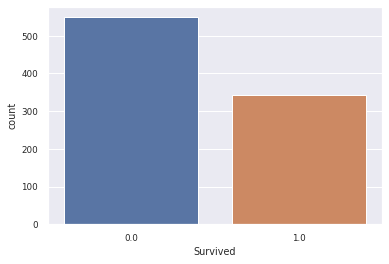

In [ ]:
# 훈련용 셋에 생존여부 그림 확인인
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

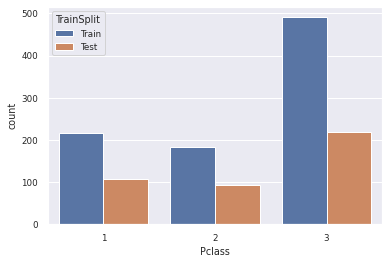

In [ ]:
# 데이터의 분포 확인

sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

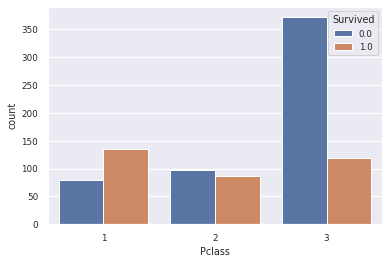

In [ ]:
# 훈련용 데이터에서 Pclass별 Survived 여부
sns.countplot(x='Pclass', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

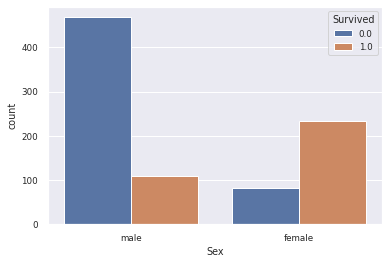

In [ ]:
# 훈련용 데이터에서 성별 생존 여부
sns.countplot(x='Sex', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()


In [ ]:
data['Sex']
# 여성은 0 남성은 1로 학습을 시킬수 있게 변경한다. 

0        male
1      female
2      female
3      female
4        male
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 1309, dtype: object

In [ ]:
# 레이블 인코딩 (female: 0, male: 1)
data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex']=='male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

In [ ]:
# 성별 분포 확인
data['Sex'].value_counts(dropna=False)

1    843
0    466
Name: Sex, dtype: int64

In [ ]:
data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int64

In [ ]:
# Name(이름)에서 Mr. Dona 등 title 정보를 추출 (신분을 나타내는 정보)

data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [ ]:
title_name = data['Name'].str.split(", ", expand=True)[1]

In [ ]:
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: 0, dtype: int64

In [ ]:
import numpy as np

title = title.replace(['Ms'], 'Miss')
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer'], 'Noble')
title = title.replace(['Col', 'Major', 'Capt'], 'Officer')
title = title.replace(['Dr', 'Rev'], 'Priest')
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Mr         757
Miss       262
Mrs        197
Master      61
Priest      16
Noble        9
Officer      7
Name: Title, dtype: int64

In [ ]:
# Name 열 삭제
data = data.drop('Name', axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

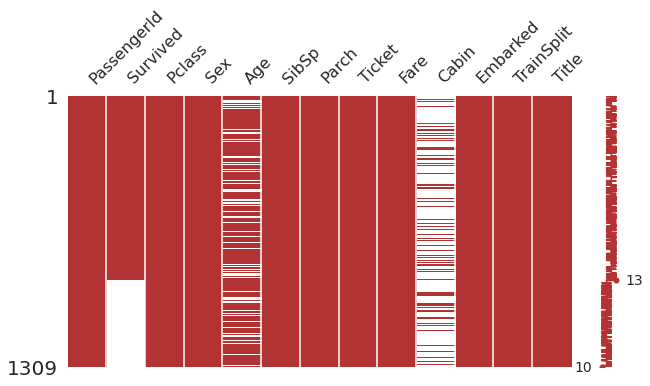

In [ ]:
msno.matrix(data, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

In [ ]:
# age 에 상당히 많은 수의 결측치를 확인할수 있다. 
# 따라서 결측치가 있는 데이터를 모두 삭제하게되면 데이터 전체의 양이 너무 많이 줄어든다. 
# 생각할수 있는 방법은 결측치를 대체 해야하는데 나이의 평균을 따지면 너무 많은 인원의 나이가
# 40살로 변경되면 데이터의 왜곡이 심해진다. 최빈값으로 하기에는 0살부터 80살까지 넓게
# 분포가 되어 있으므로 최빈값도 결국 의미가 없다. 

In [ ]:
#결측값 확인 및 대체
for title in data['Title'].unique():
    # 결측값 개수 확인
    print("%s 결측값 개수: " % title, data.loc[data['Title']==title, 'Age'].isnull().sum())  
    # 각 Title의 중앙값으로 대체  
    age_med = data.loc[data['Title']==title, 'Age'].median()
    data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)

Mr 결측값 개수:  176
Mrs 결측값 개수:  27
Miss 결측값 개수:  51
Master 결측값 개수:  8
Noble 결측값 개수:  0
Priest 결측값 개수:  1
Officer 결측값 개수:  0


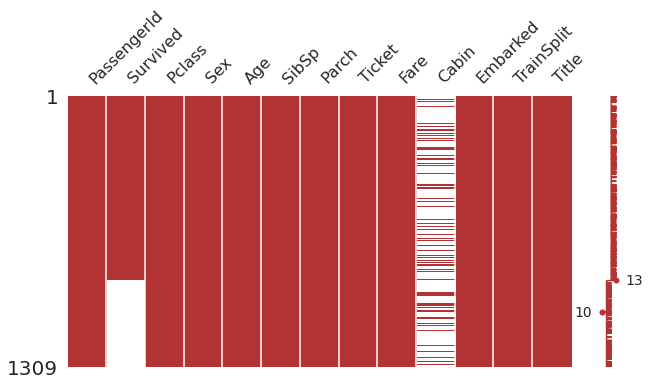

In [ ]:
msno.matrix(data, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

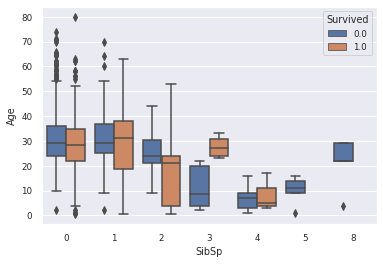

In [ ]:
# 형제자매/배우자 수와 승객 나이 및 생존율 관계
sns.boxplot(x='SibSp', y='Age', hue='Survived', 
            data=data[data['TrainSplit']=='Train'])
plt.show()

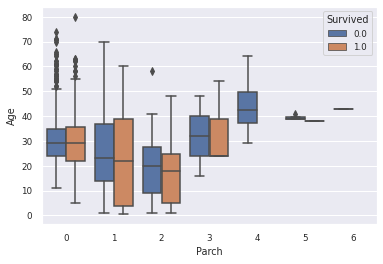

In [ ]:
sns.boxplot(x='Parch', y='Age', hue='Survived', 
            data=data[data['TrainSplit']=='Train'])
plt.show()

In [ ]:
# 가족 구성원의 수
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [ ]:
data.loc[data['Fare'].isnull(),:]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,1


In [ ]:
# 3등석 사람들의 요금의 평균 why? 상관관계분석에서 Fare 와 Pclass 가장 컷다. 

data.loc[data['Pclass']==3, 'Fare'].mean()

13.302888700564973

In [ ]:
data['Fare'] = data['Fare'].fillna(data.loc[data['Pclass']==3, 'Fare'].mean())

In [ ]:
data.loc[data['Fare'].isnull(),:]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,FamilySize


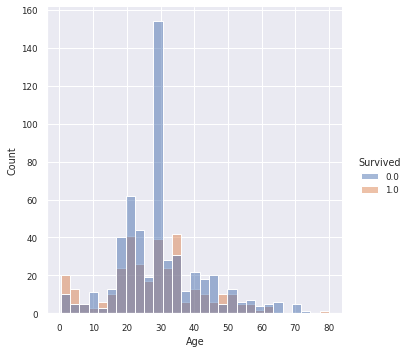

In [ ]:
# Age 분포
sns.displot(x='Age', kind='hist', hue='Survived', 
            data=data[data['TrainSplit']=='Train'])
plt.show()

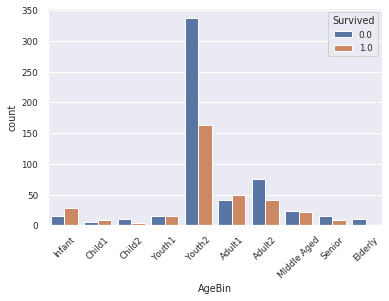

In [ ]:
# Binning - 구간 나누기
bins = [0, 4, 8, 12, 16, 32, 36, 48, 56, 64, 100]
labels = ['Infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2','MIddle Aged', 'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Age_bin (나이 구간)에 따른 생존율 비교
sns.countplot(x = 'AgeBin', hue = 'Survived', 
              data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['AgeBin']

0      Youth2
1      Adult2
2      Youth2
3      Adult1
4      Adult1
        ...  
413    Youth2
414    Adult2
415    Adult2
416    Youth2
417    Infant
Name: AgeBin, Length: 1309, dtype: category
Categories (10, object): ['Infant' < 'Child1' < 'Child2' < 'Youth1' ... 'Adult2' < 'MIddle Aged' <
                          'Senior' < 'Elderly']

In [ ]:
data['Title']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414     Noble
415        Mr
416        Mr
417    Master
Name: Title, Length: 1309, dtype: object

In [ ]:
# 원핫인코딩

# 머신러닝에 학습을 시키기 위해서는 숫자 특히 실수형 데이터 만 필요하다. 
# 문자 혹은 카테고리형 데이터를 숫자/실수형을 변환해야 하는데
# 만약 종류가 10단계 만약 0~9까지의 숫자로 변환할 경우 의도하지 않게 
# 크기가 발생된다. 

In [ ]:

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

for col in ['Title', 'AgeBin']:
  encoder = LabelEncoder()
  data[col]= encoder.fit_transform(data[col])

  

In [ ]:
data['Title']

0      2
1      3
2      1
3      3
4      2
      ..
413    2
414    4
415    2
416    2
417    0
Name: Title, Length: 1309, dtype: int64

In [ ]:
data['AgeBin']

0      9
1      1
2      9
3      0
4      0
      ..
413    9
414    1
415    1
416    9
417    5
Name: AgeBin, Length: 1309, dtype: int64

In [ ]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,FamilySize,AgeBin
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,2,2,9
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Train,3,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,1,1,9
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,Train,3,2,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,Train,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1,29.0,0,0,A.5. 3236,8.0500,NaN,S,Test,2,1,9
414,1306,NaN,1,0,39.0,0,0,PC 17758,108.9000,C105,C,Test,4,1,1
415,1307,NaN,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test,2,1,1
416,1308,NaN,3,1,29.0,0,0,359309,8.0500,NaN,S,Test,2,1,9


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title',
       'FamilySize', 'AgeBin'],
      dtype='object')

In [ ]:
selected_features = ['Pclass','Sex','SibSp', 'Parch','Fare','Title','FamilySize', 'AgeBin']
selected_features


['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Title', 'FamilySize', 'AgeBin']

In [ ]:
data['Pclass']= data['Pclass'].astype('float')
data['Sex']= data['Sex'].astype('float')
data['SibSp']= data['SibSp'].astype('float')
data['Parch']= data['Parch'].astype('float')
data['Fare']= data['Fare'].astype('float')
data['Title']= data['Title'].astype('float')
data['FamilySize']= data['FamilySize'].astype('float')
data['AgeBin']= data['AgeBin'].astype('float')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   float64
 3   Sex          1309 non-null   float64
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   float64
 6   Parch        1309 non-null   float64
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  TrainSplit   1309 non-null   object 
 12  Title        1309 non-null   float64
 13  FamilySize   1309 non-null   float64
 14  AgeBin       1309 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 163.6+ KB


In [ ]:
train_pre = data[['Pclass','Sex','SibSp', 'Parch','Fare','Title','FamilySize', 'AgeBin', 'TrainSplit']]
train_pre

,Pclass,Sex,SibSp,Parch,Fare,Title,FamilySize,AgeBin,TrainSplit
0,3.0,1.0,1.0,0.0,7.2500,2.0,2.0,9.0,Train
1,1.0,0.0,1.0,0.0,71.2833,3.0,2.0,1.0,Train
2,3.0,0.0,0.0,0.0,7.9250,1.0,1.0,9.0,Train
3,1.0,0.0,1.0,0.0,53.1000,3.0,2.0,0.0,Train
4,3.0,1.0,0.0,0.0,8.0500,2.0,1.0,0.0,Train
...,...,...,...,...,...,...,...,...,...
413,3.0,1.0,0.0,0.0,8.0500,2.0,1.0,9.0,Test
414,1.0,0.0,0.0,0.0,108.9000,4.0,1.0,1.0,Test
415,3.0,1.0,0.0,0.0,7.2500,2.0,1.0,1.0,Test
416,3.0,1.0,0.0,0.0,8.0500,2.0,1.0,9.0,Test


In [ ]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
X_train = data.loc[data['TrainSplit']=='Train', selected_features] 
X_test = data.loc[data['TrainSplit']=='Test', selected_features]
print("Train 데이터셋 크기: ", X_train.shape, y_train.shape)
print("Test 데이터셋 크기: ", X_test.shape)


Train 데이터셋 크기:  (891, 8) (891,)
Test 데이터셋 크기:  (418, 8)


In [ ]:
# 훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.2, 
                                             shuffle=True, random_state=20)
print("훈련 데이터셋 크기: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기: ", X_val.shape, y_val.shape)

훈련 데이터셋 크기:  (712, 8) (712,)
검증 데이터셋 크기:  (179, 8) (179,)


In [ ]:
# 로지스틱 회귀 모델
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)

y_tr_pred = lr_model.predict(X_tr)
print("Accuracy: %.4f" % accuracy_score(y_tr, y_tr_pred))

Accuracy: 0.7893


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=10)

tree_clf.fit(X_tr, y_tr)

y_tr_pred = tree_clf.predict(X_tr)
print("Accuracy: %.4f" % accuracy_score(y_tr, y_tr_pred))

Accuracy: 0.9368
